Note: The contents of this notebook, including the helper functions, can be viewed (commented on via a PR) at [this Github repository](https://github.com/klp/cuny_gc_python_class_sp2022/tree/master/home_work/2022-04-14) if desired.

# Text Analysis Assignment

## Assignment Details

The text below is a summary from [this document](https://docs.google.com/document/d/1FNRmAS_vc-2eQESHH6uZMcuDVr720rsx-aDWGH3oz_Y/edit?usp=sharing).

The main goal of the assignment is to have you practice the tools we have been using in class.

The requirements are:

- Choose one or more texts to work with.
- Either save the text files in your working directory, or have python get them from a web address.
- If needed: convert your text from bytes to a string
- Tokenize your text
- Make it an NLTK text object so you can use nltk tools on it
- Clean the text in a way that is appropriate for the kind of analysis you want to do.
- Run some analysis
- Report findings

Important notes:

- If you plan to use functions, have your functions as a separate python file and import it in your main file.

- Please, over-comment your script. Make sure to comment every step of the way. Make sure to not only explain what you are doing in terms of code, but also your analytical goal too. For instance, both "I am running a for loop to remove the common words" and "I am trying to see how these two authors compare in terms of the ratio of unusual words to total words" are kind of comments I want to see.


## Assignment Submission

### Itinerary

I want to compare usage of modal verbs in American/English men and women authors from 19th century / early 20th literature. I wonder if there is any difference based on nationality or gender. To do my proposed analysis, I will:

- Download a sample of raw texts from [Project Gutenberg](https://www.gutenberg.org/) using `urllib`
- Convert the texts from bytes to a string
- Tokenize the texts
- Make it an NLTK text object
- Clean the texts, including removing front matter and other empherma from Project Gutenberg texts
- Create a list of modal verbs, filter for these works in each text
- Look at the frequency distributions in modal verbs within each text, and between them

### Imports

In the cell below, I'm importing the libraries/modules:

In [1]:
from urllib.request import urlopen  # requesting and opening a file on the internet
import nltk                         # our tool for text analysis
nltk.download('punkt')              # required to run word_tokenized() initially
nltk.download('stopwords')          # required for stopwords
nltk.download('averaged_perceptron_tagger')    # required for pos_tag
nltk.download('universal_tagset')              # required when tagset='universal'
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from helper_funcs import raw_to_tokens, lowered, first_fifty_k, filter_for_words 
from helper_funcs import remove_stops, isolate_pos, present_round_percentage

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaiprenger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaiprenger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaiprenger/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/kaiprenger/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Collecting the texts from Project Gutenberg

The first step is to get the raw texts from Project Gutenburg. This work is demonstrated in the cells below:

In [2]:
# Create variables for each plain text file on PG
custom_of_country_url = 'https://www.gutenberg.org/cache/epub/11052/pg11052.txt'
little_dorrit_url = 'https://www.gutenberg.org/files/963/963-0.txt'
persuasion_url = 'https://www.gutenberg.org/cache/epub/105/pg105.txt'
the_awkward_age_url = 'https://www.gutenberg.org/files/7433/7433-0.txt'


In [3]:
# Open URLs
custom_country_file = urlopen(custom_of_country_url)
little_dorrit_file = urlopen(little_dorrit_url)
persuasion_file = urlopen(persuasion_url)
the_awkward_age_file = urlopen(the_awkward_age_url)

In [4]:
# Read in the texts and assign them to a variables
custom_country_raw = custom_country_file.read()
little_dorrit_raw = little_dorrit_file.read()
persuasion_raw = persuasion_file.read()
the_awkward_age_raw = the_awkward_age_file.read()

### Converting the raw text to strings and lists

Below, I demonstrate that while we have the texts available, they're in a format that isn't conducive to text analysis. We will convert these UTF-8 bytes to strings, and finally, to lists.

In [5]:
# Check type for a given text
type(little_dorrit_raw)

bytes

If you were run `little_dorrit_raw` you'll notice when the text is in bytes, you'll get unicode embedded into the text (e.g. `b'\xef\xbb\xbf\r\n`). Next, we will decode the raw files into a string to make it more usable for text analysis.

In [6]:
custom_of_country = custom_country_raw.decode()
little_dorrit = little_dorrit_raw.decode()
persuasion = persuasion_raw.decode()
awkward_age = the_awkward_age_raw.decode()

In [7]:
# check the type for a given text
type(awkward_age)

str

At this point, the entire text is a string, which provides a grain per letter of the text and may not be super useful for a text analysis. Below you'll see slicing into the text by the first 50 characters to see what we mean by not useful.

Side note: If you were to run `awkward_age` you would continue to see unicode like `'\ufeff`. 

In [8]:
awkward_age[:50]

'\ufeffThe Project Gutenberg EBook of The Awkward Age, b'

Next, we'll tokenize the text, in order to create a list of strings made up of each discrete element separated by spaces (?)

In [9]:
awkward_age_tokens = nltk.word_tokenize(awkward_age)
custom_of_country_tokens = nltk.word_tokenize(custom_of_country)
little_dorrit_tokens = nltk.word_tokenize(little_dorrit)
persuasion_tokens = nltk.word_tokenize(persuasion)


In [10]:
# validate that the tokens are words
awkward_age_tokens[:50]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Awkward',
 'Age',
 ',',
 'by',
 'Henry',
 'James',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '.',
 'You',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License']

OK, so this is all really repetitive, so I decided to create a function afterwards called `raw_to_tokens` to do this work on the raw data.

In [11]:
awkward_age_tokens = raw_to_tokens(the_awkward_age_raw)
custom_of_country_tokens = raw_to_tokens(custom_country_raw)
little_dorrit_tokens = raw_to_tokens(little_dorrit_raw)
persuasion_tokens = raw_to_tokens(persuasion_raw)

### Prepping the text
With these texts coming from Project Gutenberg (PG), we'll need to clean up front matter and post script/licensing that PG provides. I will do this by

1. Inspecting the first relevant words of a novel 
2. Identify what I believe to be the word which is likely to not be a part of the front matter that GP adds
3. Find the index of the word above in the word tokenized list for the novel
4. Perform two slices to make sure to only include the text between the first sentence and the last sentence[<sup>1</sup>](#fn1), excluding the PG cruft
5. Remove non-alphabet characters, and lower the case on words.


#### Prepping the Awkward Age

In [12]:
awkward_age_tokens.index('recall')

127

In [13]:
awkward_age_tokens[126:131]

['I', 'recall', 'with', 'perfect', 'ease']

We'll start our slice for `awkward_age_tokens` at 126. But we also need end the slice to remove post-novel text and license information.

In [14]:
awkward_age_tokens[-25:]    # Inspecting the end of the text to find this out

['Archive',
 'Foundation',
 ',',
 'how',
 'to',
 'help',
 'produce',
 'our',
 'new',
 'eBooks',
 ',',
 'and',
 'how',
 'to',
 'subscribe',
 'to',
 'our',
 'email',
 'newsletter',
 'to',
 'hear',
 'about',
 'new',
 'eBooks',
 '.']

I decided to approximate where the novel ends here by looking at the producer name of this text version.

In [15]:
awkward_age_tokens.index('Sobol')

118

In [16]:
awkward_age_tokens[118]

'Sobol'

The method above doesn't work, because the name is mentioned at the beginning. Let's look for the index from a slice beyond the index above.

In [17]:
awkward_age_wo_pref = awkward_age_tokens[126:]

In [18]:
awkward_age_wo_pref.index('Sobol')

181183

In [19]:
awkward_age_wo_pref[181183]

'Sobol'

In [20]:
awkward_age_wo_pref[181100:181116]    # trying to nail down the index of the last word of the text

['I',
 'see',
 '.',
 'There',
 'we',
 'are',
 '.',
 'Well',
 ',',
 '”',
 'said',
 'Mr.',
 'Longdon',
 '--',
 '“',
 'to-morrow.']

In [21]:
awkward_age_tokens_sliced = awkward_age_wo_pref[:181116]

In [22]:
awkward_age_tokens_sliced[:7]    # first seven tokens of the text

['I', 'recall', 'with', 'perfect', 'ease', 'the', 'idea']

In [23]:
awkward_age_tokens_sliced[-9:]    # last nine tokens of the text

['Well', ',', '”', 'said', 'Mr.', 'Longdon', '--', '“', 'to-morrow.']

#### Prepping Custom of the Country 

In [24]:
custom_of_country_tokens.index('Undine')

127

In [25]:
custom_of_country_tokens[126:135]

["''", 'Undine', 'Spragg', '--', 'how', 'can', 'you', '?', "''"]

In [26]:
custom_of_country_token_no_pref = custom_of_country_tokens[126:]

In [27]:
custom_of_country_token_no_pref.index('Proofreaders')    # in the producer name

166205

In [28]:
custom_of_country_token_no_pref[166129]    # last word in the text

'for'

In [29]:
custom_of_country_tokens_sliced = custom_of_country_token_no_pref[:166131]

In [30]:
custom_of_country_tokens_sliced[-20:]    # last twenty items after slice

['welcome',
 'her',
 'first',
 'guests',
 'she',
 'said',
 'to',
 'herself',
 'that',
 'it',
 'was',
 'the',
 'one',
 'part',
 'she',
 'was',
 'really',
 'made',
 'for',
 '.']

#### Prepping Little Dorrit

In [31]:
little_dorrit_tokens.index('occupied')

584

In [32]:
little_dorrit_tokens[581:597]    # First sentence

['I',
 'have',
 'been',
 'occupied',
 'with',
 'this',
 'story',
 ',',
 'during',
 'many',
 'working',
 'hours',
 'of',
 'two',
 'years',
 '.']

In [33]:
little_dorrit_tokens_wo_pref = little_dorrit_tokens[581:]

In [34]:
little_dorrit_tokens_wo_pref.index('Widger')

413529

In [35]:
little_dorrit_tokens_wo_pref[413460]    # last word novel

'uproar'

In [36]:
little_dorrit_tokens_sliced = little_dorrit_tokens_wo_pref[:413460]

In [37]:
little_dorrit_tokens_sliced[-47:]    # last sentence confirmed

['They',
 'went',
 'quietly',
 'down',
 'into',
 'the',
 'roaring',
 'streets',
 ',',
 'inseparable',
 'and',
 'blessed',
 ';',
 'and',
 'as',
 'they',
 'passed',
 'along',
 'in',
 'sunshine',
 'and',
 'shade',
 ',',
 'the',
 'noisy',
 'and',
 'the',
 'eager',
 ',',
 'and',
 'the',
 'arrogant',
 'and',
 'the',
 'froward',
 'and',
 'the',
 'vain',
 ',',
 'fretted',
 'and',
 'chafed',
 ',',
 'and',
 'made',
 'their',
 'usual']

In [38]:
little_dorrit_tokens_prep = lowered(little_dorrit_tokens_sliced)

#### Prepping Persuasion

In [39]:
persuasion_tokens.index('Elliot')

123

In [40]:
persuasion_tokens[121:141]    # part of the first sentence

['Sir',
 'Walter',
 'Elliot',
 ',',
 'of',
 'Kellynch',
 'Hall',
 ',',
 'in',
 'Somersetshire',
 ',',
 'was',
 'a',
 'man',
 'who',
 ',',
 'for',
 'his',
 'own',
 'amusement']

In [41]:
persuasion_tokens_wo_pref = persuasion_tokens[121:]

In [42]:
persuasion_tokens_wo_pref[:8]

['Sir', 'Walter', 'Elliot', ',', 'of', 'Kellynch', 'Hall', ',']

In [43]:
persuasion_tokens_wo_pref.index('Finis')

97842

In [44]:
persuasion_tokens_sliced = persuasion_tokens_wo_pref[:97842]

In [45]:
persuasion_tokens_sliced[-10:]     # part of the last sentence

['in',
 'its',
 'domestic',
 'virtues',
 'than',
 'in',
 'its',
 'national',
 'importance',
 '.']

### Normalization

Now that our texts culled of Project Gutenberg boilerplate, we can normalize the text along the following lines:

1. Remove non-alphabet characters, as our study focuses on stylistics related to words
2. Convert all chracters to lower case
3. Take a sample from each text to avoid counts from longer texts distorting the modal verb analysis from shorter texts[<sup>2</sup>](#fn2)

In [46]:
# Let's remove non-alphabet characters and convert all words to lower case in one step
awkward_age_tokens_prep = lowered(awkward_age_tokens_sliced)
custom_of_country_tokens_prep = lowered(custom_of_country_tokens_sliced)
little_dorrit_tokens_prep = lowered(little_dorrit_tokens_sliced)
persuasion_tokens_prep = lowered(persuasion_tokens_sliced)

In [47]:
# First, let's check to see which is the shortest test
awkward_len = len(awkward_age_tokens_prep)
custom_len = len(custom_of_country_tokens_prep)
dorrit_len = len(little_dorrit_tokens_prep)
persuasion_len = len(persuasion_tokens_prep)

In [48]:
print(f"The Awkward Age is {awkward_len} words long.")
print(f"Custom of the country is {custom_len} words long.")
print(f"Little Dorrit is {dorrit_len} words long.")
print(f"Persuasion is {persuasion_len} words long.")

The Awkward Age is 139732 words long.
Custom of the country is 137847 words long.
Little Dorrit is 338169 words long.
Persuasion is 82937 words long.


Alright, let's take a reasonable sample given that Persuasion is the shortest text, and Little Dorrit at minimum for times larger than the other three texts.

In [49]:
awkward_age_tokens_norm = first_fifty_k(awkward_age_tokens_prep)
custom_of_country_tokens_norm = first_fifty_k(custom_of_country_tokens_prep)
little_dorrit_tokens_norm = first_fifty_k(little_dorrit_tokens_prep)
persuasion_tokens_norm = first_fifty_k(persuasion_tokens_prep)

Let's verify the new normalized lists:

In [50]:
len(awkward_age_tokens_norm)

50000

### Filter out all non-modal verbs

OK, now we'll take those normalized lists of strings/words from each novel, and filter out non-modal verbs

In [51]:
modal_verbs = ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'should']

In [52]:
awkward_modals = filter_for_words(awkward_age_tokens_norm, modal_verbs)
custom_modals = filter_for_words(custom_of_country_tokens_norm, modal_verbs)
dorrit_modals = filter_for_words(little_dorrit_tokens_norm, modal_verbs)
persuasion_modals = filter_for_words(persuasion_tokens_norm, modal_verbs)

In [53]:
awkward_modals[:10]

['will',
 'should',
 'can',
 'may',
 'may',
 'must',
 'might',
 'could',
 'might',
 'would']

### Frequency distribution of modal verbs

We can look at the frequency distributions of the modal verbs in each text.

In [54]:
awkward_fdist =  FreqDist(awkward_modals)
custom_fdist = FreqDist(custom_modals)
dorrit_fdist = FreqDist(dorrit_modals)
persuasion_fdist = FreqDist(persuasion_modals)

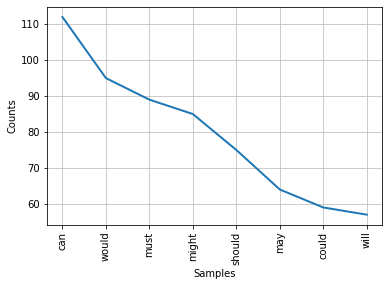

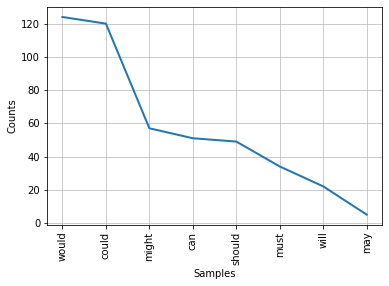

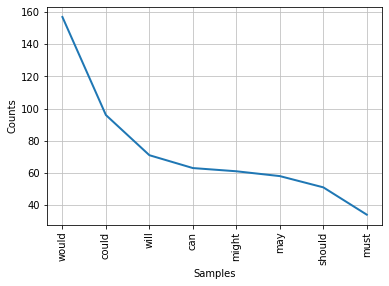

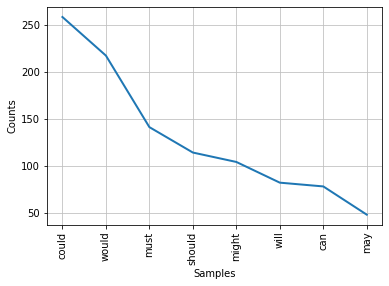

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
awkward_fdist.plot()
custom_fdist.plot()
dorrit_fdist.plot()
persuasion_fdist.plot()

### Analysis

There are a couple of interesting things to note here. One is that Henry James' `The Awkward Age` is the only novel of this corpus in which `can` is listed in the top two modal verbs; all other novels in the corpus favor `could` and `would` as the top two verbs. It's interesting to think of `can` as a more assertive flavor of `could` in the context of `The Awkward Age`.

Of course, `The Awkward Age` stands out from the rest of this corpus stylistically. Coming right before James' ill-fated career change as a playwright, this novel is made up mostly of dialog, which may explain the abberation in `can` appearing more often than `could` in the other novels in the sample.

One follow-up question I might have seeing this is how many total modals each text uses in the sample of 50,000 words. It appears that Austen's text might have the most models within the sample, which may indicate a higher level of abstractness (?) in the text.

In [56]:
awkward_modal_len = len(awkward_modals)
custom_modal_len = len(custom_modals)
dorrit_modal_len = len(dorrit_modals)
persuasion_modals_len = len(persuasion_modals)

In [57]:
print(f"The Awkward Age has {awkward_modal_len} modal verbs in this sample.")
print(f"Custom of the Country {custom_modal_len} modal verbs in this sample.")
print(f"Little Dorrit has {dorrit_modal_len} modal verbs in this sample.")
print(f"Persuasion has {persuasion_modals_len} modal verbs in this sample.")

The Awkward Age has 636 modal verbs in this sample.
Custom of the Country 462 modal verbs in this sample.
Little Dorrit has 591 modal verbs in this sample.
Persuasion has 1042 modal verbs in this sample.


It's worth remarking the Austen's text `Persuasion` has an order of magnitude more modal verbs in the first 50,000 characters than the other three texts. I wonder if this makes sense given the fact that each of the other three texts present a coming of age story with a young protagnist, vs. an older woman in the case of Austen's text.

It's not surprising to me that `Little Dorrit` would have the fewest of these type of verbs, with Dickens being less concerned with modality, being```related to likelihood, ability, permission, request, capacity, suggestion, order, obligation, or advice``` as [Wikipedia suggests](https://en.wikipedia.org/wiki/Modal_verb). I would be interested in looking at the whole texts with stop words removed, and see what the proportion of modal verbs are to all other words.

In [58]:
awkward_no_stops = remove_stops(awkward_age_tokens_prep)
custom_no_stops = remove_stops(custom_of_country_tokens_prep)
dorrit_no_stops = remove_stops(little_dorrit_tokens_prep)
persuasion_no_stops = remove_stops(persuasion_tokens_prep)

In [59]:
ct_awkward_no_stops = len(awkward_no_stops)
ct_custom_no_stops = len(custom_no_stops)
ct_dorrit_no_stops = len(dorrit_no_stops)
ct_persuasion_no_stops = len(persuasion_no_stops)

In [60]:
awkward_percent_modals = (awkward_modal_len / ct_awkward_no_stops)
custom_percent_modals = (custom_modal_len / ct_custom_no_stops)
dorrit_percent_modals = (dorrit_modal_len / ct_dorrit_no_stops)
persuasion_percent_modals = (persuasion_modals_len / ct_persuasion_no_stops)

In [61]:
print(f"Modal verbs represent {present_round_percentage(awkward_percent_modals)} % of the words in The Awkward Age.")
print(f"Modal verbs represent {present_round_percentage(custom_percent_modals)} % of the words in Custom of the Country.")
print(f"Modal verbs represent {present_round_percentage(dorrit_percent_modals)} % of the words in Little Dorrit.")
print(f"Modal verbs represent {present_round_percentage(persuasion_percent_modals)} % of the words in Persuasion.")

Modal verbs represent 1.09 % of the words in The Awkward Age.
Modal verbs represent 0.72 % of the words in Custom of the Country.
Modal verbs represent 0.39 % of the words in Little Dorrit.
Modal verbs represent 2.76 % of the words in Persuasion.


Again, Austen's `Persuasion` takes a solid lead in the use of modal verbs in this corpus from this point of view. It may be interesting to see the percentage of modal verbs in comparison with other verbs used in each text.

In [62]:
awkward_pos = pos_tag(awkward_no_stops, tagset='universal')
custom_pos = pos_tag(custom_no_stops, tagset='universal')
dorrit_pos = pos_tag(dorrit_no_stops, tagset='universal')
persuasion_pos = pos_tag(persuasion_no_stops, tagset='universal')

In [63]:
awkward_total_verbs = isolate_pos(awkward_pos, 'VERB')
custom_total_verbs = isolate_pos(custom_pos, 'VERB')
dorrit_total_verbs = isolate_pos(dorrit_pos, 'VERB')
persuasion_total_verbs = isolate_pos(persuasion_pos, 'VERB')

In [64]:
# Here we're calculating the percentage of modal verbs out of all verbs per text.
awkward_percent_modal_verbs = awkward_modal_len / len(awkward_total_verbs)
custom_percent_modal_verbs = custom_modal_len / len(custom_total_verbs)
dorrit_percent_modal_verbs = dorrit_modal_len / len(dorrit_total_verbs)
persuasion_percent_modal_verbs = persuasion_modals_len / len(persuasion_total_verbs)

In [65]:
print(f"Modal verbs represent {present_round_percentage(awkward_percent_modal_verbs)} % of the verbs in The Awkward Age.")
print(f"Modal verbs represent {present_round_percentage(custom_percent_modal_verbs)} % of the verbs in Custom of the Country.")
print(f"Modal verbs represent {present_round_percentage(dorrit_percent_modal_verbs)} % of the verbs in Little Dorrit.")
print(f"Modal verbs represent {present_round_percentage(persuasion_percent_modal_verbs)} % of the verbs in Persuasion.")

Modal verbs represent 3.92 % of the verbs in The Awkward Age.
Modal verbs represent 2.58 % of the verbs in Custom of the Country.
Modal verbs represent 1.42 % of the verbs in Little Dorrit.
Modal verbs represent 10.03 % of the verbs in Persuasion.


I guess my hypothesis from this intial investigation might be that novels in the third person with older (women?) protagonists may feature more sense of `likelihood, ability, permission, request, capacity, suggestion, order, obligation, or advice` than older protagonists? Obviously, I need to dig in deeper and wider to try and substantiate or reject this hypothesis. 

### Footnotes

<span id="fn1"> 1. I included author prefaces because we're doing stylistics analysis. </span>

<span id="fn2"> 2. Having a percent of total could also help, but this seemed more in keeping with the class material, and I ran out of time to figure out how to drop a list of lists into a Pandas dataframe to do that easily. </span>